In [ ]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Create a Pyomo model
model = ConcreteModel()

# Define parameters
C_internal = 750000  # Cost of internal maintenance per fault type
C_external_normal = 50000  # Cost of external maintenance per trip during the normal season
C_external_high_demand = 150000  # Cost of external maintenance per trip during the high-demand season

# Define decision variables
model.x_internal = Var(domain=NonNegativeIntegers)  # Number of internal maintenance actions
model.x_external_normal = Var(domain=NonNegativeIntegers)  # External maintenance actions during normal season
model.x_external_high_demand = Var(domain=NonNegativeIntegers)  # External maintenance actions during high-demand season

# Define objective function (example: minimize total maintenance cost)
def objective_rule(model):
    return (C_internal * model.x_internal +
            C_external_normal * model.x_external_normal +
            C_external_high_demand * model.x_external_high_demand)
model.objective = Objective(rule=objective_rule, sense=minimize)

# Define constraints

# Internal Maintenance Constraint
model.internal_constraint = Constraint(
    expr=(C_external_normal * model.x_external_normal +
          C_external_high_demand * model.x_external_high_demand <=
          C_internal * model.x_internal)
)

# Add a maintenance demand constraint
faults_to_address = 100  # Example value
model.maintenance_demand = Constraint(
    expr=(model.x_internal + model.x_external_normal + model.x_external_high_demand >= faults_to_address)
)

# Solve the model using Gurobi solver
gurobi_path = '/Users/aushanaehaller/anaconda3/envs/turbine_env/bin/gurobi_cl'
solver = SolverFactory('gurobi', executable=gurobi_path)
results = solver.solve(model, tee=True)

# Display results
x_internal = model.x_internal.value
x_external_normal = model.x_external_normal.value
x_external_high_demand = model.x_external_high_demand.value
total_cost = model.objective()

print("Optimal Solution:")
print(f"x_internal: {x_internal}")
print(f"x_external_normal: {x_external_normal}")
print(f"x_external_high_demand: {x_external_high_demand}")
print(f"Total Cost: {total_cost}")


Read LP format model from file /var/folders/gc/lxb9l40d205c1603s2q2rzxc0000gn/T/tmpz1sw51u_.pyomo.lp
Reading time = 0.00 seconds
x1: 2 rows, 3 columns, 6 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x55610d82
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+05]
  Objective range  [5e+04, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective 7.500000e+07
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective 9.900000e+06, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      | 

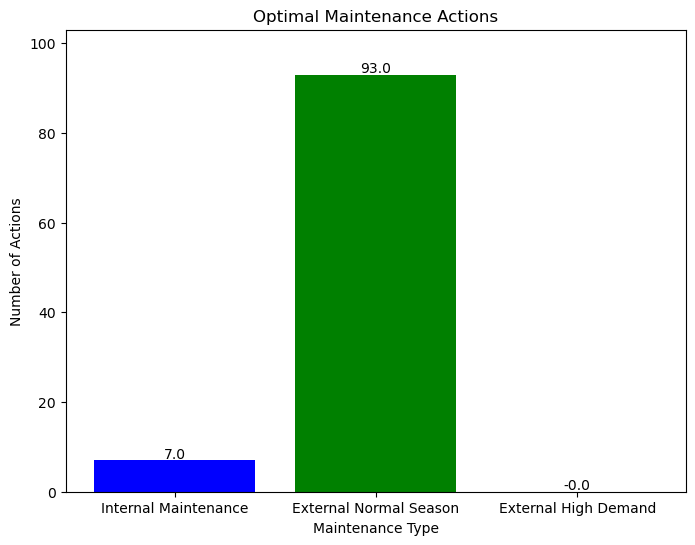

In [19]:
import matplotlib.pyplot as plt

# Visualization
labels = ['Internal Maintenance', 'External Normal Season', 'External High Demand']
values = [x_internal, x_external_normal, x_external_high_demand]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Optimal Maintenance Actions')
plt.ylabel('Number of Actions')
plt.xlabel('Maintenance Type')
plt.ylim(0, max(values) + 10)

# Annotate values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=10)

plt.show()

In [ ]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Create a Pyomo model
model = ConcreteModel()

# Define parameters
C_internal = 750000  # Cost of internal maintenance per fault type
C_external_normal = 50000  # Cost of external maintenance per trip during the normal season
C_external_high_demand = 150000  # Cost of external maintenance per trip during the high-demand season

# Define decision variables
model.x_internal = Var(domain=NonNegativeIntegers)  # Number of internal maintenance actions
model.x_external_normal = Var(domain=NonNegativeIntegers)  # External normal maintenance actions
model.x_external_high = Var(domain=NonNegativeIntegers)  # External high maintenance actions

# Define objective function (example: minimize total external maintenance cost)
def objective_rule_external(model):
    return (C_external_high_demand * model.x_external_high + C_external_normal * model.x_external_normal)
#model.objective = Objective(rule=objective_rule_external, sense=minimize)

# Define objective function (example: minimize total maintenance cost)
def objective_rule_internal(model):
    return (C_internal * model.x_internal)
#model.objective = Objective(rule=objective_rule_internal, sense=minimize)

# Combine objectives for Total Maintenance Cost
model.obj = Objective(rule=lambda model: objective_rule_internal(model) + objective_rule_external(model), sense=minimize)

# Define constraints

# Internal Maintenance Constraint
model.internal_constraint = Constraint(
    expr=(C_external_normal * model.x_external_normal +
          C_external_high_demand * model.x_external_high <=
          C_internal)
)

# Add a maintenance demand constraint
faults_to_address = 100  # Example value
high_seasonality = 0.94 # Example value
model.maintenance_demand = Constraint(
    expr=(model.x_internal + ((1-high_seasonality) * model.x_external_normal) + (high_seasonality * model.x_external_high) == faults_to_address)
)

# Solve the model using Gurobi solver
gurobi_path = '/Users/aushanaehaller/anaconda3/envs/turbine_env/bin/gurobi_cl'
solver = SolverFactory('gurobi', executable=gurobi_path)
results = solver.solve(model, tee=True)

# Display results
x_internal = model.x_internal.value
x_external_normal = model.x_external_normal.value
x_external_high = model.x_external_high.value
total_cost = model.obj()

print("Optimal Solution:")
print(f"x_internal: {x_internal}")
print(f"x_external_normal: {x_external_normal}")
print(f"x_external_high_demand: {x_external_high}")
print(f"Total Cost: {total_cost}")


Read LP format model from file /var/folders/gc/lxb9l40d205c1603s2q2rzxc0000gn/T/tmp0h2oi3p9.pyomo.lp
Reading time = 0.00 seconds
x1: 2 rows, 3 columns, 5 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x7bc93a94
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 2e+05]
  Objective range  [5e+04, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 8e+05]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 5 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Found heuristic solution: objective 7.500000e+07
Found heuristic solution: objective 7.445000e+07
Found heuristic solution: objective 7.335000e+07

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 

python(6598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


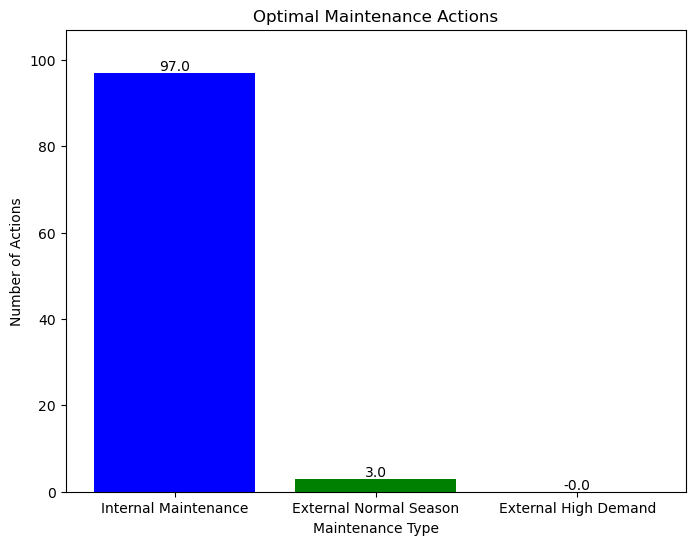

In [18]:
import matplotlib.pyplot as plt

# Visualization
labels = ['Internal Maintenance', 'External Normal Season', 'External High Demand']
values = [x_internal, x_external_normal, x_external_high_demand]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Optimal Maintenance Actions')
plt.ylabel('Number of Actions')
plt.xlabel('Maintenance Type')
plt.ylim(0, max(values) + 10)

# Annotate values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=10)

plt.show()

In [23]:
data = []
for seasonailities in range(0,100,10):
    for faults in range (0,40,10):
        high_seasonality = seasonailities/100
        faults_to_address = faults
        results = solver.solve(model, tee=True)
        # Results
        x_internal = model.x_internal.value
        x_external_normal = model.x_external_normal.value
        x_external_high = model.x_external_high.value
        total_cost = model.obj()
        data.append([x_internal, x_external_normal, x_external_high, total_cost])

data[0]


Read LP format model from file /var/folders/gc/lxb9l40d205c1603s2q2rzxc0000gn/T/tmp8gr2cbvy.pyomo.lp
Reading time = 0.00 seconds
x1: 2 rows, 3 columns, 5 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x7bc93a94
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 2e+05]
  Objective range  [5e+04, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 8e+05]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 5 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Found heuristic solution: objective 7.500000e+07
Found heuristic solution: objective 7.445000e+07
Found heuristic solution: objective 7.335000e+07

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 

[97.0, 3.0, 3.0, 73350000.0]

In [24]:
data[0:4]

[[97.0, 3.0, 3.0, 73350000.0],
 [97.0, 3.0, 3.0, 73350000.0],
 [97.0, 3.0, 3.0, 73350000.0],
 [97.0, 3.0, 3.0, 73350000.0]]